# Run simulations in Python inspired by Excel solver and Crystal Ball


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import scipy as sp
import scipy.stats as st
import pickle as pkl
import csv as csv
print ("Modules Imported!")

Modules Imported!


## Some More on Python:

#### Dictionaries and Classes:

In [2]:
Rating = {'Burger King': 4, 'Five Guys':7, 'Chipotle':6, 'Panda Express':5, 'Subway':4} #Creates a dictionary
print (Rating.keys()) #Returns an array of the keys
print (Rating['Burger King']) #Returns the value associated with the key 'Burger King'

dict_keys(['Burger King', 'Five Guys', 'Chipotle', 'Panda Express', 'Subway'])
4


In [4]:
Rating = {'Burger King': 4, 'Five Guys':7, 'Chipotle':6, 'Panda Express':5, 'Subway':4} #Creates a dictionary
for i in ['Burger King', 'Five Guys', 'Chick-Fil-A'] :   
    if i in Rating: #First checks if the key exists
        print (i,Rating[i])

Burger King 4
Five Guys 7


In [5]:
Rating = {'Burger King': 4, 'Five Guys':7, 'Chipotle':6, 'Panda Express':5, 'Subway':4, 'Chipotle': 9} #Creates a dictionary
print (Rating.keys())
print ([Rating[i] for i in Rating.keys()])
print (Rating)

dict_keys(['Burger King', 'Five Guys', 'Chipotle', 'Panda Express', 'Subway'])
[4, 7, 9, 5, 4]
{'Burger King': 4, 'Five Guys': 7, 'Chipotle': 9, 'Panda Express': 5, 'Subway': 4}


In [ ]:
class Student:
    def __init__(self, name, ID):
        self.n = name
        self.i = ID
    def getName(self):
        return self.n
    def getID(self):
        return self.i

The above code is just an example and won't return anything, but make sure you run it anyways. Like the modules that we imported, if we create a custom class and run it once, then all the other cells in our Python notebook will have access to it. There are a few things that should have stood out to you in the code we just ran. The first is the "__init__" function. It is a version of a constructor method common to object oriented programming languages such as Java, and is what you would use to declare a new instance of your class. Second is the "self" keyword that appears in all of the methods. In order to have access to methods and variables within the class itself, you need to reference the class by using the keyword "self". It's kind of like the "this" keyword in JAVA, but is more explicitly expressed here. Finally, the "__init__" function indicates that in our class we pass two parameters (other than self) which will become instance variables for the instances of the class that we will create.  The code below creates an instance of the Student class.

In [ ]:
s = Student("Jiaming", "4123")
print (s.getName())
print (s.getID())
print (s.n)
print (s.i)

Notice how the instance variables we created were not in fact private, so our get methods are not needed (other than to illustrate how things work, of course).

#### Reading and Writing Files

It is very useful to know how to read and write files in python. So below we will go over some of the basics with I/O. When loading and saving files you can specify the entire filepath, but I find it much easier to keep the files coordinating to each lab in the same folder and just using relative filepaths. We can write to a text file very easily using the code below. If you were to look in the folder where this ipython notebook file is held, you would see the file below.

In [ ]:
#Writes a simple statement to a text file
filepath = 'lab2_simple.txt'
f = open(filepath, 'w') #Opens file. 'w' signifies we want to write to it.  
                        #'w' erases existing file; use 'a' to append to an existing file
f.write('This is a simple example') #Writes to the text file
f.close()

Likewise we can load the text file back using the following:

In [ ]:
filepath = 'lab2_simple.txt' 
f = open(filepath) #Opens the file, default behavior is to read (not write)
print (f.read()) #Reads the text file
f.close()

This is fairly easy yet, since it's a text file everything we store in it needs to be a string. This becomes a bit of a pain if we would want to store things like a dictionary that describes a random variable. This has a mix of strings, floats, and possibly
 others. While it's easy to get the string of each of these and save them in a text file, it's much harder to load back and then parse through to convert everything back. Instead we can use the Python Pickle module. Let's use it to save the dictionary we created above.

In [ ]:
filepath = 'lab2_dictionary.pkl'
d = {'one':(1./6,-1),'two':(1./6,5),'three':(1./6,-5),'four':(1./6,1),'five':(1./6,-5),'six':(1./6,1)}
f = open(filepath,'wb') # open in binary mode
pkl.dump(d,f)
f.close()

Now you should see a .pkl file in the same folder which represents our dictionary. It's a bit less conveniant than a text file  because it's not exactly readable by an outside program. However, we can load it back and manipulate our dictionary just as before.

In [ ]:
filepath = 'lab2_dictionary.pkl'
f = open(filepath,'rb') # open in binary mode
d = pkl.load(f)
f.close()
print (d['one'])
print (d['five'][1])

Finally we can also load in image files. You should have a file along with this lab called SacramentoMap.png. Make sure that this is also in the same folder as the ipython notebook. We can load and plot the image with the following code. It should look similar to the outline given by our crime map.

These were just the basics of file loading and saving. Depending on formatting and other issues, it may be necessary to dive into these modules a bit deeper to better suit your circumstances. However, this is a very good start to being able to use I/O.

## Bernoulli Processes:

In the previous lab, you were introduced with both the Bernoulli distribution and the binomial distribution. A *random process* is simply a collection of random variables indexed by time. A Bernoulli process is given by $X=(X_1,X_2, \ldots)$ where $X_t \sim Bernoulli(p)$ for each $t$ and the $X$'s are mutually independent. It is simply a sequence of Bernoulli RVs. We can calculate probabilities involving the process at multiple times fairly easily, e.g. $P\{X_3=1,X_6=0,X_{11}=1,X_{13}=1\}=p(1-p)pp=p^3(1-p)$. When considering a random processes, it is helpful to visualize, or produce by computer simulation, a typical sample path.   A <I> sample path </I> of a random process is the deterministic function of time that results from performing the probability experiment for the underlying probability space, and selecting a realization, or variate, for each of the random variables invovled.   Generating a sample path of a random process by computer simulation is particularly simple in case the random variables of the process are mutually independent, such as Bernoulli processes.  For such processes, variates of the individual random variables can be generated separately.  Below is a sample path of a Bernnoulli process $X=(X_1,X_2, \ldots)$ with p=1/7.  Run the code several times to see different sample paths.

In [ ]:
p = 1./7 #Probability
T = 30 #Number of time steps
X = []  #Creates a list for the values of the random variables
for i in range(1,T+1):   #range(1,T+1) is the list of numbers 1 through T
    X.append(st.bernoulli.rvs(p)) #Fills the list with Bernoulli(p) variates
plt.plot(range(1,T+1),X, 'o')
plt.title('Sample Path of Bernoulli process with p=1/7')
plt.ylim((0,2))
plt.ylabel('$X(\omega)$') #You can use LaTex in the Python code
plt.xlabel('Time')

## Poisson distribution as limit of binomial distribution

There is yet another important piece to this puzzle, and that is the Poisson distribution. The Poisson distribution has a single parameter $\lambda$ and a probability mass function given by: $p(k) = \frac{e^{-\lambda}\lambda^k}{k!}$ for $k\geq 0.$ The parameter $\lambda$ represents a mean such as the number of hits of a website in one minute, or the number of misspelled words in a document. Thus $p(k)$ represents the probability the number of events occuring is $k$ given that the average number of events that occur is $\lambda$. The Poisson distribution is frequently used because it is a good approximation for the binomial distribution when $n$ is large, $p$ is small, and $np \approx \lambda$.  It is simpler than the binomial; it only has one parameter and it doesn't involve binomial coefficients. Let's say you create a website and that your website gets on average 1200 hits per day. This is set up as a Poisson distribution where $\lambda = 1200$, but we can also model this as a binomial. If we were to break down the day into minute increments then the probability that a hit occurs in any given minute is $p = \frac{1200}{24*60} = \frac{5}{6}$ and there are $n = 24*60 = 1440$ minutes in a day. Below is a graph of this binomial approximation of the Poisson.

In [ ]:
lamb =1200 #Average number of hits per day
n = 60*24. #Number of minutes in a day
p = lamb/n #Probability of a hit occuring in a minute
print ('p =', p)

k = range(2*lamb)
plt.plot(k,st.binom.pmf(k,n,p), 'b', label = 'Binomial')
plt.plot(k,st.poisson.pmf(k,lamb), 'r', label = 'Poisson')
plt.title('PMF of Hits Per Day')
plt.legend()

x = np.linspace(0,2*lamb,10000)
plt.figure()
plt.plot(x,st.binom.cdf(x,n,p), 'b', label = 'Binomial')
plt.plot(x,st.poisson.cdf(x,lamb), 'r', label = 'Poisson')
plt.ylim(0,1.2)
plt.title('CDF of Hits Per Day')
plt.legend()

These two distributions don't really look that close to each other. Why is that? In order for this approximation to be accurate, we require that $n$ be large, $p$ be small, and $np \approx \lambda$. Here $n$ is fairly large but $p$ is not close to zero at all.  The variance of the Poisson(1200) distribution is 1200, while the variance of the Binom(1440,5/6) distribution is only 1440*(5/6)*(1/6)=200. Clearly, we haven't broken the day up into small enough increments.  So let's now break it up into seconds.

In [ ]:
lamb = 1200 #Average number of hits per day
n = 60*60*24. #Number of seconds in a day
p = lamb/n #Probability of a hit occuring in a minute
print ('p =', p)

X = st.binom(n,p)
Y = st.poisson(lamb)

k = range(2*lamb)
plt.plot(k,X.pmf(k), 'b', label = 'Binomial')
plt.plot(k,Y.pmf(k), 'r', label = 'Poisson')
plt.title('PMF of Hits Per Day')
plt.legend()

x = np.linspace(0,2*lamb,10000)
plt.figure()
plt.plot(x,X.cdf(x), 'b', label = 'Binomial')
plt.plot(x,Y.cdf(x), 'r', label = 'Poisson')
plt.ylim(0,1.2)
plt.title('CDF of Hits Per Day')
plt.legend()

Now our approximation is so close that the two distributions are almost indistinguishable from each other. If we kept increasing n and decreasing p we would find that the approximation continues to improve. So, symbolically, $\lim_{n\to \infty, p\to  0, np \to \lambda} Binom(n,p) = Pois(\lambda).$  If you encounter a binomial variable with large $n$ and small $p,$ it may be easier to calculate probabilities based on the Poisson distribution.

While working on this lab, I have a probability of $p=.013$ of finishing a section during any given minute. Let's say that there are 300 sections that need to be completed and I have 8 weeks to finish the lab (assume I work 40 hours/week). What's the probability that I complete the lab before the start of the semester? Equivalently what is the probability that I finish at least 300 sections? In order to answer this question, do the following:
<html>
    <body>
        <ol>
            <li> Create a binomial variable X to represent the number of sections I complete (for this and other parts of the
            problem, assume I keep working at the same rate if I finish completing 300 sections).</li>
            <li> Create a Poisson variable Y to represent the same number, using the Poisson approximation.
            Make sure to print out what $\lambda$ is.</li>
            <li> Find the probability of my success (i.e. completing at least 300 sections) using the CDFs of each RV. Do they agree?</li>
            <li> Find the probability that I finish exactly 300 sections using the pmf of each RV.  Do they agree? </li>
        </ol>
    </body>
</html>

In [ ]:
########Student Answer##############

###################################

## Confidence Intervals:

When we talk about confidence intervals, it's important to review the difference between two keywords: population and sample. If you've ever watched news stations during a campaign season, you'll notice they often show percentages. Roy Cooper is running for governor of North Carolina and the percentage of voters who support him is 49%. Where does this number come from? It would be foolhardy for the news station to go out and try to poll every single eligible voter in the state of North Carolina. Instead they select only a fraction of the eligible voters and project those results to indicate the entire state. In this example, the population would be all of the eligible voters in North Carolina, and the sample would be those that the news station polled. 

When we do confidence intervals, like the news station we are looking to estimate some measure of the population by only looking at a small sample of the population. Often hidden in the news station reports are the intervals and confidence levels of their percentage. A more exact statement of candidate Roy would be "the percentage of voters who support Roy Cooper is 49% with polling accuracy $\pm$2% and a confidence of 95%." This means that the confidence interval has width 4% and, before the vote was taken, there was at least a 95% probability that the confidence interval would contain the true percentage.

Let's take another look at our voting scenario. It's an election season and Roy Cooper is running for the governor. Let's assume there are 100,000 eligible voters in North Carolina (there are really about 4.7 million, but that's a bit too large to deal with at the moment). Attached to this lab is a pickle file called voters.pkl which contains every person's response to whether they support Roy Cooper. Your job is to become the news reporter and determine how much support Roy Cooper has based on different samples. Load the file into an array and:
<ol>
    <li> Find the confidence interval if you sample 100 random voters and want a confidence level of 95%. </li>
    <li> Suppose we sample 4,000 random voters plot the confidence interval versus the confidence level. </li>
    <li> Suppose we wanted a confidence level of 90%. Plot the confidence interval versus the sample size. For each sample size include the mean and each of the bounds for the interval.
</ol>

In [2]:
########Constructive Code##############
X = st.bernoulli(.53)
s = 100000
x = X.rvs(size=s)
filepath = 'voters.pkl'
f = open(filepath, 'wb')
pkl.dump(x,f)
f.close()
print ('File Saved')
########Will Be Removed##############

File Saved


Text(0.5, 0, 'Confidence Interval')

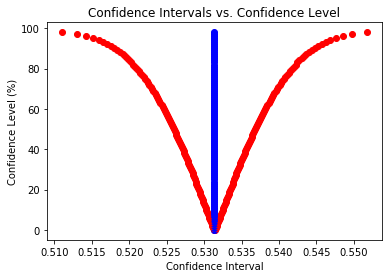

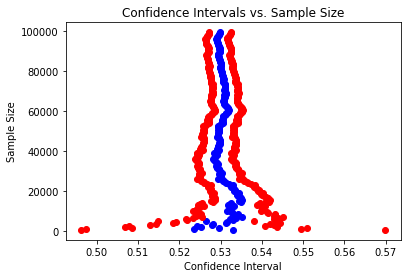

In [5]:
# code using t.interval from scipy.stats
filepath = 'voters.pkl'
f = open(filepath,'rb')
x = pkl.load(f)
s = 0.0
sampleSize = 4000

sample=x[0:(sampleSize-1)] # assume the first 4000 is the sample we have

for cl in range(1,100):

    int_cl= st.norm.interval(cl/100, loc=np.mean(sample),scale=st.sem(sample))
    plt.plot(int_cl[0],[cl-1],'ro')
    plt.plot(int_cl[1],[cl-1],'ro')
    plt.plot(np.mean(sample),[cl-1],'bo')
plt.title('Confidence Intervals vs. Confidence Level')
plt.ylabel('Confidence Level (%)')
plt.xlabel('Confidence Interval')

plt.figure()
populationSize = 100000.
samplesTaken = 200.
delta = []
cl = .9
for i in range(1,(int)(samplesTaken)):
    sampleSize = (int)(i/samplesTaken*populationSize)
    sample=x[0:(sampleSize-1)]  
    int_cl=st.norm.interval(cl/100, loc=np.mean(sample),scale=st.sem(sample))
    plt.plot(int_cl[0],sampleSize,'ro')
    plt.plot(int_cl[1],sampleSize,'ro')
    plt.plot(np.mean(sample),sampleSize,'bo')
plt.title('Confidence Intervals vs. Sample Size')
plt.ylabel('Sample Size')
plt.xlabel('Confidence Interval')
###################################